In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree 
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [3]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
titanic["Sex"] = titanic["Sex"].replace("male",1)
titanic["Sex"] = titanic["Sex"].replace("female",0)
X = titanic.drop(['PassengerId','Survived',"Name","Ticket","Cabin"],axis=1)
y = titanic[["Survived"]]
X = pd.get_dummies(X)
X = X.fillna({'Age':X['Age'].median()})
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [4]:
X.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)#test_size-размер тестового множества

In [6]:
clf = tree.DecisionTreeClassifier()

In [7]:
parametrs = {'criterion':['gini','entropy'],'max_depth':range(1,30)}

In [8]:
grid_search_cv_clf = GridSearchCV(clf,parametrs,cv=5)

In [9]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [10]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [11]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=11)>

In [12]:
best_clf.score(X_test,y_test)

0.7728813559322034

In [13]:
from sklearn.metrics import precision_score,recall_score

In [14]:
y_pred = best_clf.predict(X_test)

In [15]:
precision_score(y_test,y_pred)

0.7523809523809524

In [16]:
recall_score(y_test,y_pred)

0.6583333333333333

In [17]:
a = pd.DataFrame([1,0,0,1,1,1,1])
b= np.array([1,0,0,0,0,0,0])
print(precision_score(a,b))
print(recall_score(a,b))


1.0
0.2


In [18]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [19]:
y_prdicted = best_clf.predict(X_test)
y_prdicted

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [20]:
np.where(y_predicted_prob[:,1]>0.8, 1, 0)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [21]:
y_pred = np.where(y_predicted_prob[:,1]>0.8, 1, 0)

In [22]:
precision_score(y_test,y_pred)

0.7938144329896907

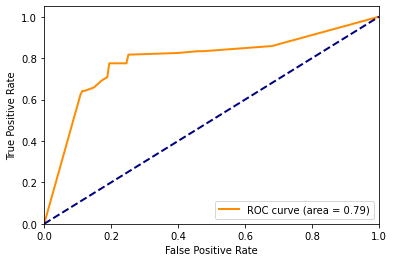

In [23]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## 2.7

In [30]:
df = pd.read_csv('train_data_tree.csv')
X = df.drop(['num'],axis=1)
y = df['num']
df

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [76]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [77]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

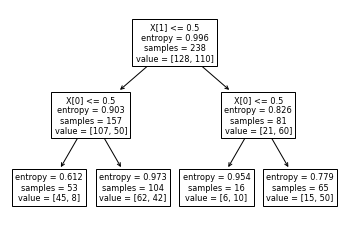

In [78]:
tree.plot_tree(clf.fit(X,y))

In [75]:
left = clf.tree_.children_left[0]#левый потомок корня
right = clf.tree_.children_right[0]#правый потомок корня

entropy_parent = clf.tree_.impurity[0]#считаем энтропию корня
entropy_left   = clf.tree_.impurity[left]#энтропия левого потомка
entropy_right  = clf.tree_.impurity[right]#энтропия правого потомка

samples_parent = sum(clf.tree_.value[0][0])
samples_left = sum(clf.tree_.value[left][0])
samples_right = sum(clf.tree_.value[right][0])

entropy_children = entropy_left*samples_left/samples_parent + entropy_right*samples_right/samples_parent
IG = entropy_parent - entropy_children
IG

0.11939340343891591

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[155,  20],
       [ 43,  77]], dtype=int64)

In [85]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('true negative:',tn)
print('false positive:',fp)
print('false negative:',fn)
print('true positive',tp)

true negative: 155
false positive: 20
false negative: 43
true positive 77


# 2.10

In [89]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression='zip')
submission_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip', compression='zip')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')
now = 1526772811
drop_out_threasold = 2592000

users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')
users_data = users_data.fillna(0)
users_invent_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()
users_data = users_data.merge(users_invent_data, how = 'outer')
users_days = events_data.groupby('user_id').day.nunique()
users_days.to_frame().reset_index()
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')
users_data['passed_corse'] = users_data.passed > 170

In [101]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [97]:
users_data[users_data['passed_corse']==True].day.median()

20.0

In [99]:
user_min_time = events_data.groupby('user_id',as_index=False)\#записываем первое взаимодействие юзеров с курсом
    .agg({'timestamp':'min'})\
    .rename({'timestamp':'min_timestamp'},axis=1)

In [100]:
users_data = users_data.merge(user_min_time, how='outer')

In [102]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [103]:
events_data_train = pd.DataFrame()

In [144]:
# for user_id in users_data.user_id:
#     min_user_time = users_data[users_data.user_id==user_id].min_timestamp.item()
#     user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp<min_user_time+3*24*60*60)]
# #     event_data_train = event_data_train.append(user_events_data)
#     for j in range(len(user_events_data)):
#         event_data_train.loc[len(event_data_train.index)] =user_events_data.iloc[j,:]
# #     event_data_train.loc[len(event_data_train.index)] = [list(user_events_data.iloc[i,:]) for i in range(len(user_events_data))]
# event_data_train

In [145]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [148]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)
events_data

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,11677_1526772685
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [149]:
learning_time_threshold = 3*24*60*60

In [150]:
user_learning_time_threshold = user_min_time.user_id.map(str)+'_'+(user_min_time.min_timestamp + learning_time_threshold).map(str)

In [151]:
user_learning_time_threshold

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [153]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold
user_min_time

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860
...,...,...,...
19229,26790,1451484016,26790_1451743216
19230,26793,1510225031,26793_1510484231
19231,26794,1495287049,26794_1495546249
19232,26797,1508425316,26797_1508684516


In [157]:
events_data = events_data.merge(user_min_time[['user_id','user_learning_time_threshold']],how='outer')
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [162]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [245]:
event_data_train = pd.read_csv('event_data_train.csv')

In [246]:
submissions_data_train = pd.read_csv('submissions_data_train.csv')

In [247]:
submissions_data_train 

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [248]:
max_time_stamp = submissions_data_train.groupby('user_id',as_index=False).agg({'timestamp':'max'}).rename({'timestamp':'max_timestamp'},axis=1)

In [250]:
submissions_data_train =submissions_data_train.merge(max_time_stamp[['user_id','max_timestamp']],how='outer')

In [251]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,max_timestamp
0,31971,1434349275,correct,15853,1479734163
1,31972,1434348300,correct,15853,1479734163
2,31972,1478852149,wrong,15853,1479734163
3,31972,1478852164,correct,15853,1479734163
4,31976,1434348123,wrong,15853,1479734163
...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,1501946959
509100,120745,1503059927,correct,13177,1503059927
509101,120745,1506348153,wrong,15253,1506348153
509102,120745,1523035316,wrong,1424,1523035316


In [252]:
submissions_data_train.max_timestamp =submissions_data_train.max_timestamp.map(str)
submissions_data_train.timestamp = submissions_data_train.timestamp.map(str)

In [253]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,max_timestamp
0,31971,1434349275,correct,15853,1479734163
1,31972,1434348300,correct,15853,1479734163
2,31972,1478852149,wrong,15853,1479734163
3,31972,1478852164,correct,15853,1479734163
4,31976,1434348123,wrong,15853,1479734163


In [254]:
submissions_data_train = submissions_data_train[submissions_data_train.submission_status == 'wrong']
submissions_data_train

,step_id,timestamp,submission_status,user_id,max_timestamp
2,31972,1478852149,wrong,15853,1479734163
4,31976,1434348123,wrong,15853,1479734163
15,32031,1434363465,wrong,15853,1479734163
33,32795,1434520465,wrong,15853,1479734163
38,32812,1434346160,wrong,15853,1479734163
...,...,...,...,...,...
509096,120745,1500154509,wrong,3310,1500154533
509099,120745,1501946959,wrong,2615,1501946959
509101,120745,1506348153,wrong,15253,1506348153
509102,120745,1523035316,wrong,1424,1523035316


In [261]:
failed =submissions_data_train[submissions_data_train.timestamp == submissions_data_train.max_timestamp]
failed

,step_id,timestamp,submission_status,user_id,max_timestamp
1696,33025,1436094981,wrong,18175,1436094981
5588,32173,1435303058,wrong,6053,1435303058
5848,33669,1436431976,wrong,13793,1436431976
6184,33350,1490785375,wrong,19739,1490785375
7332,32202,1492184437,wrong,17578,1492184437
...,...,...,...,...,...
509088,120745,1490136174,wrong,5608,1490136174
509099,120745,1501946959,wrong,2615,1501946959
509101,120745,1506348153,wrong,15253,1506348153
509102,120745,1523035316,wrong,1424,1523035316


In [265]:
failed.groupby('step_id',as_index=False).agg({'submission_status':'count'}).sort_values(by='submission_status')

,step_id,submission_status
59,33686,1
57,33684,1
55,33676,1
29,32929,1
43,33482,1
...,...,...
42,33481,78
19,32202,92
11,32031,97
28,32812,133


In [264]:
failed.groupby('step_id',as_index=False).agg({'submission_status':'count'}).sort_values(by='submission_status').tail(1)#answer

,step_id,submission_status
4,31978,154


,step_id,submission_status
4,31978,154


In [267]:
submissions_data=submission_data
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [328]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day':'days'})

In [329]:
X.head()#количество проведенных дней за первые 3 дня

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [330]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id':'steps_tried'})

In [331]:
steps_tried.head()#количество степов которые попытался решить

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [332]:
X = X.merge(steps_tried)

In [333]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [334]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                                      columns='submission_status',
                                      values='step_id',
                                      aggfunc='count',
                                      fill_value=0).reset_index())

In [335]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [336]:
X['correct_ratio'] = X.correct/(X.correct+X.wrong)
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [337]:
X = X.merge(events_data_train.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0)\
            .reset_index()[['user_id','viewed']],how='outer')
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [338]:
X = X.fillna(0)
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1
19230,26781,0.0,0.0,0.0,0.0,0.00,6
19231,26788,0.0,0.0,0.0,0.0,0.00,1
19232,26789,0.0,0.0,0.0,0.0,0.00,2


In [339]:
X = X.merge(users_data[['user_id','passed_corse','is_gone_user']],how='outer')

In [340]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [341]:
X = X[~((X.is_gone_user == False) & (X.passed_corse == False))]#человек прошел курс или его не бросил

In [342]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [343]:
y = X.passed_corse

In [344]:
X = X.drop(['passed_corse','is_gone_user'],axis=1)

In [345]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1
19230,26781,0.0,0.0,0.0,0.0,0.00,6
19231,26788,0.0,0.0,0.0,0.0,0.00,1
19232,26789,0.0,0.0,0.0,0.0,0.00,2
